In [1]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)
from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import numpy as np
import seaborn as sns
from functools import reduce
import scipy
import os

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


/bin/sh: line 1: sox: command not found

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


### layerwise correlations

Plotting trained and shuffled distributions for deepspeech2
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
Number of channels returned: (258,)
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
Peak corr (median): 0.6484780021166769, occurs at x_coordinate: 2
Peak corr (max): 0.9511698206379672, occurs at x_coordinate: 1
Peak corr (median): 0.5601141372031923, occurs at x_coordinate: 0
Peak corr (max): 0.9107809231102884, occurs at x_coordinate: 2
p-value for 0: 1.2421585823288656e-15
p-value for 1: 9.102089838681114e-29
p-value for 2: 2.5295433463204678e-30
p-value for 3: 2.9898282732320413e-33
p-value for 4: 5.890014838369647e-17
p-value for 5: 0.9997871213415861
p-value for 6: 0.9918032629515148
Applying threshold: 0.072 on column: 'normalizer'...
model_name 'baseline' not recognizable!!!
p-value for 0: 4.3329404342987945e-35
p-value for 1: 1.7483323011204672e-43
p-value for 2: 4.119074996481954e-42


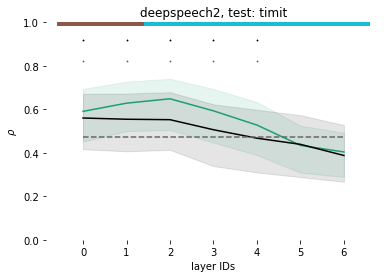

In [12]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	# 'wav2letter_modified',
	# 'wav2vec2',
	# 'speech2text',
	# 'whisper_tiny',
	# 'whisper_base',
	'deepspeech2',
    #
	# 'w2v2_generic'
]
threshold=None
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
untrained_identifiers = [f'reset_{trained_identifier}']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
save_tikz = False
normalized=True
bin_width = 50
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
model_name = model_names[0]
plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

In [ ]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	# 'wav2vec2',
	# 'speech2text',
	# 'whisper_tiny',
	# 'whisper_base',
	# 'deepspeech2',
    #
	# 'w2v2_generic'
]
threshold=None
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
untrained_identifiers = [f'reset_{trained_identifier}']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
save_tikz = False
normalized=True
bin_width = 50
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
model_name = model_names[0]
plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

### summary of peak correlations

Poisson Process: Null distribution for bin_width: 50, spike_rate: 50...
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At bin_width: 50, layer with peak median is: 3
Number of sig. neurons = 258
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At bin_width: 50, layer with peak median is: 0
Number of sig. neurons = 258
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At bin_width: 50, layer with peak median is: 5
Number of sig. neurons = 258
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At bin_width: 50, layer with peak median is: 1
Number of sig. neurons = 258
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At bin_width: 50, layer with peak median is: 5
Number of sig. neurons = 258
Extracting column: normalized_test_cc
Applying threshold: 0.072 on column: 'normalizer'...
At

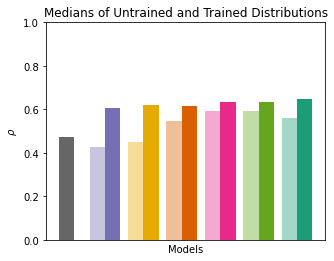

In [3]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
identifier = 'timit_trf_lags300_bw50_naplib_matched'
mVocs=False
bin_width = 50
save_tikz = True
tikzplots.plot_correlations_summary(
	model_names,
	identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)


Poisson Process: Null distribution for bin_width: 50, spike_rate: 50...
Extracting column: mVocs_normalized_test_cc
Applying threshold: 0.087 on column: 'mVocs_normalizer'...
At bin_width: 50, layer with peak median is: 6
Number of sig. neurons = 314
Extracting column: mVocs_normalized_test_cc
Applying threshold: 0.087 on column: 'mVocs_normalizer'...
At bin_width: 50, layer with peak median is: 0
Number of sig. neurons = 314
Extracting column: mVocs_normalized_test_cc
Applying threshold: 0.087 on column: 'mVocs_normalizer'...
At bin_width: 50, layer with peak median is: 5
Number of sig. neurons = 314
Extracting column: mVocs_normalized_test_cc
Applying threshold: 0.087 on column: 'mVocs_normalizer'...
At bin_width: 50, layer with peak median is: 14
Number of sig. neurons = 314
Extracting column: mVocs_normalized_test_cc
Applying threshold: 0.087 on column: 'mVocs_normalizer'...
At bin_width: 50, layer with peak median is: 8
Number of sig. neurons = 314
Extracting column: mVocs_normali

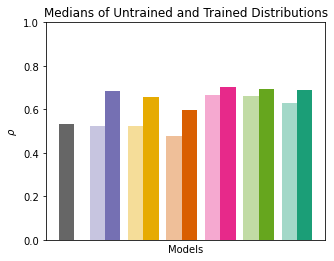

In [2]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
identifier = 'mVocs_trf_lags300_bw50_naplib_matched'
mVocs=True
bin_width = 50
save_tikz = True
tikzplots.plot_correlations_summary(
	model_names,
	identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	width = 0.4,
	alpha=0.4,
	save_tikz=save_tikz
	)
